# Лабораторная работа №2: Проведение исследований с логистической и линейной регрессией

Начнем с импорта необходимых библиотек



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)



## Подготовка данных для классификации

In [3]:
df_classification = pd.read_csv('adult.csv')

X_clf = df_classification.drop('income', axis=1)
y_clf = df_classification['income']

X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

print(f"Размер обучающей выборки: {X_clf_train.shape}")
print(f"Размер тестовой выборки: {X_clf_test.shape}")



Размер обучающей выборки: (26048, 14)
Размер тестовой выборки: (6513, 14)


## Предобработка данных для классификации(LabelEncoder, масштабирование признаков, замена пропущенных значений)

In [4]:
numeric_cols_clf = X_clf_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols_clf = X_clf_train.select_dtypes(include=['object']).columns.tolist()

print("Числовые признаки:", numeric_cols_clf)
print("Категориальные признаки:", categorical_cols_clf)

label_encoders_clf = {}
X_clf_train_encoded = X_clf_train.copy()
X_clf_test_encoded = X_clf_test.copy()

for col in categorical_cols_clf:
    le = LabelEncoder()
    X_clf_train_encoded[col] = X_clf_train_encoded[col].replace('?', 'Unknown')
    X_clf_test_encoded[col] = X_clf_test_encoded[col].replace('?', 'Unknown')
    X_clf_train_encoded[col] = le.fit_transform(X_clf_train_encoded[col].astype(str))
    X_clf_test_encoded[col] = le.fit_transform(X_clf_test_encoded[col].astype(str))
    label_encoders_clf[col] = le

scaler_clf = StandardScaler()
X_clf_train_scaled = X_clf_train_encoded.copy()
X_clf_test_scaled = X_clf_test_encoded.copy()

X_clf_train_scaled[numeric_cols_clf] = scaler_clf.fit_transform(X_clf_train_encoded[numeric_cols_clf])
X_clf_test_scaled[numeric_cols_clf] = scaler_clf.transform(X_clf_test_encoded[numeric_cols_clf])



Числовые признаки: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
Категориальные признаки: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


## Обучение модели классификации (бейзлайн)


In [5]:
lr_clf_baseline = LogisticRegression(random_state=42, max_iter=1000)

lr_clf_baseline.fit(X_clf_train_scaled, y_clf_train)

y_clf_pred_baseline = lr_clf_baseline.predict(X_clf_test_scaled)



## Оценка качества модели классификации по выбранным метрикам

In [6]:
accuracy_clf_baseline = accuracy_score(y_clf_test, y_clf_pred_baseline)
f1_clf_baseline = f1_score(y_clf_test, y_clf_pred_baseline, pos_label='>50K')

print("Результаты бейзлайн модели для классификации:")
print(f"Accuracy: {accuracy_clf_baseline:.4f}")
print(f"F1-score: {f1_clf_baseline:.4f}")
print("\nПодробный отчет по классификации:")
print(classification_report(y_clf_test, y_clf_pred_baseline))



Результаты бейзлайн модели для классификации:
Accuracy: 0.8248
F1-score: 0.5562

Подробный отчет по классификации:
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      4945
        >50K       0.71      0.46      0.56      1568

    accuracy                           0.82      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513



## Подготовка данных для регрессии


In [7]:
df_train_regression = pd.read_csv('train_data.csv')
df_test_regression = pd.read_csv('test_data.csv')

X_reg_train = df_train_regression.drop('age', axis=1)
y_reg_train = df_train_regression['age']

X_reg_test = df_test_regression.drop('age', axis=1)
y_reg_test = df_test_regression['age']

print(f"Размер обучающей выборки: {X_reg_train.shape}")
print(f"Размер тестовой выборки: {X_reg_test.shape}")



Размер обучающей выборки: (4398, 12)
Размер тестовой выборки: (1100, 12)


## Предобработка данных для регрессии(LabelEncoder, масштабирование признаков, замена пропущенных значений)


In [8]:
numeric_cols_reg = X_reg_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols_reg = X_reg_train.select_dtypes(include=['object']).columns.tolist()

print("Числовые признаки:", numeric_cols_reg)
print("Категориальные признаки:", categorical_cols_reg)

label_encoders_reg = {}
X_reg_train_encoded = X_reg_train.copy()
X_reg_test_encoded = X_reg_test.copy()

for col in categorical_cols_reg:
    le = LabelEncoder()
    X_reg_train_encoded[col] = X_reg_train_encoded[col].fillna('Unknown')
    X_reg_test_encoded[col] = X_reg_test_encoded[col].fillna('Unknown')
    X_reg_train_encoded[col] = le.fit_transform(X_reg_train_encoded[col].astype(str))
    X_reg_test_encoded[col] = le.fit_transform(X_reg_test_encoded[col].astype(str))
    label_encoders_reg[col] = le

scaler_reg = StandardScaler()
X_reg_train_scaled = X_reg_train_encoded.copy()
X_reg_test_scaled = X_reg_test_encoded.copy()

X_reg_train_scaled[numeric_cols_reg] = scaler_reg.fit_transform(X_reg_train_encoded[numeric_cols_reg])
X_reg_test_scaled[numeric_cols_reg] = scaler_reg.transform(X_reg_test_encoded[numeric_cols_reg])




Числовые признаки: ['uranium_lead_ratio', 'carbon_14_ratio', 'radioactive_decay_series', 'stratigraphic_layer_depth', 'isotopic_composition', 'fossil_size', 'fossil_weight']
Категориальные признаки: ['geological_period', 'paleomagnetic_data', 'surrounding_rock_type', 'stratigraphic_position']


## Обучение модели регрессии (бейзлайн)


In [9]:
lr_reg_baseline = LinearRegression()

lr_reg_baseline.fit(X_reg_train_scaled, y_reg_train)

y_reg_pred_baseline = lr_reg_baseline.predict(X_reg_test_scaled)

print("Модель обучена!")



Модель обучена!


## Оценка качества модели регрессии по выбранным метрикам

In [10]:
mse_reg_baseline = mean_squared_error(y_reg_test, y_reg_pred_baseline)
mae_reg_baseline = mean_absolute_error(y_reg_test, y_reg_pred_baseline)
r2_reg_baseline = r2_score(y_reg_test, y_reg_pred_baseline)

print("Результаты бейзлайн модели для регрессии:")
print(f"MSE: {mse_reg_baseline:.2f}")
print(f"MAE: {mae_reg_baseline:.2f}")
print(f"R²: {r2_reg_baseline:.4f}")
print(f"RMSE (корень из MSE): {np.sqrt(mse_reg_baseline):.2f}")



Результаты бейзлайн модели для регрессии:
MSE: 7587668.97
MAE: 2131.29
R²: 0.9688
RMSE (корень из MSE): 2754.57


### Гипотезы для улучшения качества моделей:

1. **Препроцессинг данных:**
   - Обработка пропусков значений
   - Нормализация/стандартизация признаков (уже применена)
   - Обработка выбросов

2. **Визуализация данных:**
   - Анализ распределений признаков
   - Корреляционный анализ
   - Анализ важности признаков

3. **Формирование новых признаков:**
   - Создание комбинаций признаков
   - Полиномиальные признаки
   - Взаимодействия признаков

4. **Подбор гиперпараметров:**
   - Для логистической регрессии: регуляризация (L1/L2), коэффициент регуляризации (C)
   - Для линейной регрессии: регуляризация (Ridge, Lasso, ElasticNet)
   - Использование кросс-валидации для выбора параметров


## Проверка гипотез - Препроцессинг данных

### Обработка выбросов для классификации


In [11]:

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

outliers_info = {}
for col in numeric_cols_clf:
    outliers = detect_outliers_iqr(X_clf_train[col])
    outliers_info[col] = outliers.sum()
    print(f"{col}: {outliers.sum()} выбросов ({outliers.sum()/len(X_clf_train)*100:.2f}%)")

X_clf_train_no_outliers = X_clf_train_encoded.copy()
X_clf_test_no_outliers = X_clf_test_encoded.copy()

for col in numeric_cols_clf:
    if outliers_info[col] > len(X_clf_train) * 0.05:
        Q1 = X_clf_train[col].quantile(0.25)
        Q3 = X_clf_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        X_clf_train_no_outliers[col] = X_clf_train_no_outliers[col].clip(lower=lower_bound, upper=upper_bound)
        X_clf_test_no_outliers[col] = X_clf_test_no_outliers[col].clip(lower=lower_bound, upper=upper_bound)

scaler_clf_no_out = StandardScaler()
X_clf_train_no_out_scaled = X_clf_train_no_outliers.copy()
X_clf_test_no_out_scaled = X_clf_test_no_outliers.copy()

X_clf_train_no_out_scaled[numeric_cols_clf] = scaler_clf_no_out.fit_transform(X_clf_train_no_outliers[numeric_cols_clf])
X_clf_test_no_out_scaled[numeric_cols_clf] = scaler_clf_no_out.transform(X_clf_test_no_outliers[numeric_cols_clf])

print("\nОбработка выбросов завершена!")



age: 200 выбросов (0.77%)
fnlwgt: 774 выбросов (2.97%)
education.num: 967 выбросов (3.71%)
capital.gain: 2179 выбросов (8.37%)
capital.loss: 1232 выбросов (4.73%)
hours.per.week: 7199 выбросов (27.64%)

Обработка выбросов завершена!


## Результаты модели с обработкой выбросов

In [12]:
lr_clf_no_outliers = LogisticRegression(random_state=42, max_iter=1000)
lr_clf_no_outliers.fit(X_clf_train_no_out_scaled, y_clf_train)
y_clf_pred_no_outliers = lr_clf_no_outliers.predict(X_clf_test_no_out_scaled)

accuracy_clf_no_outliers = accuracy_score(y_clf_test, y_clf_pred_no_outliers)
f1_clf_no_outliers = f1_score(y_clf_test, y_clf_pred_no_outliers, pos_label='>50K')

print("Результаты модели с обработкой выбросов:")
print(f"Accuracy: {accuracy_clf_no_outliers:.4f}")
print(f"F1-score: {f1_clf_no_outliers:.4f}")
print(f"\nСравнение с бейзлайном:")
print(f"Accuracy: {accuracy_clf_baseline:.4f} -> {accuracy_clf_no_outliers:.4f} (изменение: {(accuracy_clf_no_outliers-accuracy_clf_baseline)*100:+.2f}%)")
print(f"F1-score: {f1_clf_baseline:.4f} -> {f1_clf_no_outliers:.4f} (изменение: {(f1_clf_no_outliers-f1_clf_baseline)*100:+.2f}%)")

if accuracy_clf_no_outliers > accuracy_clf_baseline:
    print("\n✓ Гипотеза подтверждена: обработка выбросов улучшила качество")
else:
    print("\n✗ Гипотеза не подтверждена: обработка выбросов не улучшила качество")



Результаты модели с обработкой выбросов:
Accuracy: 0.8135
F1-score: 0.5248

Сравнение с бейзлайном:
Accuracy: 0.8248 -> 0.8135 (изменение: -1.14%)
F1-score: 0.5562 -> 0.5248 (изменение: -3.14%)

✗ Гипотеза не подтверждена: обработка выбросов не улучшила качество


## Формирование новых признаков для классификации


In [13]:
from sklearn.preprocessing import PolynomialFeatures

important_features = ['age', 'hours.per.week', 'education.num']
important_indices = [numeric_cols_clf.index(f) for f in important_features if f in numeric_cols_clf]

if len(important_indices) > 0:
    poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
    X_important_train = X_clf_train_scaled.iloc[:, important_indices] if hasattr(X_clf_train_scaled, 'iloc') else X_clf_train_scaled[:, important_indices]
    X_important_test = X_clf_test_scaled.iloc[:, important_indices] if hasattr(X_clf_test_scaled, 'iloc') else X_clf_test_scaled[:, important_indices]
    
    X_poly_train = poly.fit_transform(X_important_train)
    X_poly_test = poly.transform(X_important_test)
    
    X_train_values = X_clf_train_scaled.values if hasattr(X_clf_train_scaled, 'values') else X_clf_train_scaled
    X_test_values = X_clf_test_scaled.values if hasattr(X_clf_test_scaled, 'values') else X_clf_test_scaled
    
    X_clf_train_poly = np.hstack([X_train_values, X_poly_train[:, len(important_indices):]])
    X_clf_test_poly = np.hstack([X_test_values, X_poly_test[:, len(important_indices):]])
    
    print(f"Добавлено {X_poly_train.shape[1] - len(important_indices)} новых полиномиальных признаков")
    print(f"Общее количество признаков: {X_clf_train_poly.shape[1]}")
else:
    X_clf_train_poly = X_clf_train_scaled.values if hasattr(X_clf_train_scaled, 'values') else X_clf_train_scaled
    X_clf_test_poly = X_clf_test_scaled.values if hasattr(X_clf_test_scaled, 'values') else X_clf_test_scaled



Добавлено 3 новых полиномиальных признаков
Общее количество признаков: 17


## Результаты модели с полиномиальными признаками

In [14]:
lr_clf_poly = LogisticRegression(random_state=42, max_iter=1000)
lr_clf_poly.fit(X_clf_train_poly, y_clf_train)
y_clf_pred_poly = lr_clf_poly.predict(X_clf_test_poly)

accuracy_clf_poly = accuracy_score(y_clf_test, y_clf_pred_poly)
f1_clf_poly = f1_score(y_clf_test, y_clf_pred_poly, pos_label='>50K')

print("Результаты модели с полиномиальными признаками:")
print(f"Accuracy: {accuracy_clf_poly:.4f}")
print(f"F1-score: {f1_clf_poly:.4f}")
print(f"\nСравнение с бейзлайном:")
print(f"Accuracy: {accuracy_clf_baseline:.4f} -> {accuracy_clf_poly:.4f} (изменение: {(accuracy_clf_poly-accuracy_clf_baseline)*100:+.2f}%)")
print(f"F1-score: {f1_clf_baseline:.4f} -> {f1_clf_poly:.4f} (изменение: {(f1_clf_poly-f1_clf_baseline)*100:+.2f}%)")

if accuracy_clf_poly > accuracy_clf_baseline:
    print("\n✓ Гипотеза подтверждена: полиномиальные признаки улучшили качество")
else:
    print("\n✗ Гипотеза не подтверждена: полиномиальные признаки не улучшили качество")



Результаты модели с полиномиальными признаками:
Accuracy: 0.8279
F1-score: 0.5670

Сравнение с бейзлайном:
Accuracy: 0.8248 -> 0.8279 (изменение: +0.31%)
F1-score: 0.5562 -> 0.5670 (изменение: +1.08%)

✓ Гипотеза подтверждена: полиномиальные признаки улучшили качество


### Итоговая оценка гипотез для классификации


Сравнение результатов проверки гипотез для классификации:
               Гипотеза  Accuracy  F1-score
               Бейзлайн  0.824812  0.556204
     Обработка выбросов  0.813450  0.524834
Полиномиальные признаки  0.827883  0.567014

Лучшая гипотеза: Полиномиальные признаки
Лучший Accuracy: 0.8279
Лучший F1-score: 0.5670


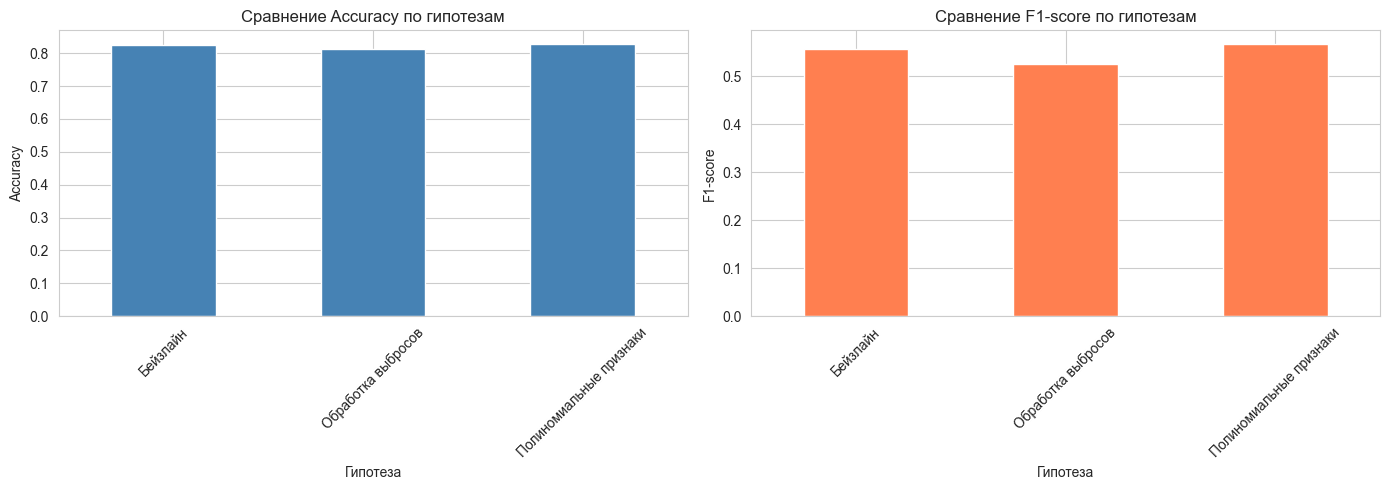

In [15]:
hypothesis_results_clf = pd.DataFrame({
    'Гипотеза': ['Бейзлайн', 'Обработка выбросов', 'Полиномиальные признаки'],
    'Accuracy': [accuracy_clf_baseline, accuracy_clf_no_outliers, accuracy_clf_poly],
    'F1-score': [f1_clf_baseline, f1_clf_no_outliers, f1_clf_poly]
})

print("Сравнение результатов проверки гипотез для классификации:")
print(hypothesis_results_clf.to_string(index=False))

best_idx = hypothesis_results_clf['F1-score'].idxmax()
best_hypothesis = hypothesis_results_clf.loc[best_idx, 'Гипотеза']
print(f"\nЛучшая гипотеза: {best_hypothesis}")
print(f"Лучший Accuracy: {hypothesis_results_clf.loc[best_idx, 'Accuracy']:.4f}")
print(f"Лучший F1-score: {hypothesis_results_clf.loc[best_idx, 'F1-score']:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
hypothesis_results_clf.plot(x='Гипотеза', y='Accuracy', kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Сравнение Accuracy по гипотезам')
axes[0].set_ylabel('Accuracy')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend().remove()

hypothesis_results_clf.plot(x='Гипотеза', y='F1-score', kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Сравнение F1-score по гипотезам')
axes[1].set_ylabel('F1-score')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend().remove()

plt.tight_layout()
plt.show()



### Проверка гипотез для регрессии


In [16]:
outliers_info_reg = {}
for col in numeric_cols_reg:
    outliers = detect_outliers_iqr(X_reg_train[col])
    outliers_info_reg[col] = outliers.sum()
    print(f"{col}: {outliers.sum()} выбросов ({outliers.sum()/len(X_reg_train)*100:.2f}%)")

X_reg_train_no_outliers = X_reg_train_encoded.copy()
X_reg_test_no_outliers = X_reg_test_encoded.copy()

for col in numeric_cols_reg:
    if outliers_info_reg[col] > len(X_reg_train) * 0.05:
        Q1 = X_reg_train[col].quantile(0.25)
        Q3 = X_reg_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        X_reg_train_no_outliers[col] = X_reg_train_no_outliers[col].clip(lower=lower_bound, upper=upper_bound)
        X_reg_test_no_outliers[col] = X_reg_test_no_outliers[col].clip(lower=lower_bound, upper=upper_bound)

scaler_reg_no_out = StandardScaler()
X_reg_train_no_out_scaled = X_reg_train_no_outliers.copy()
X_reg_test_no_out_scaled = X_reg_test_no_outliers.copy()

X_reg_train_no_out_scaled[numeric_cols_reg] = scaler_reg_no_out.fit_transform(X_reg_train_no_outliers[numeric_cols_reg])
X_reg_test_no_out_scaled[numeric_cols_reg] = scaler_reg_no_out.transform(X_reg_test_no_outliers[numeric_cols_reg])

print("\nОбработка выбросов для регрессии завершена!")



uranium_lead_ratio: 13 выбросов (0.30%)
carbon_14_ratio: 0 выбросов (0.00%)
radioactive_decay_series: 19 выбросов (0.43%)
stratigraphic_layer_depth: 23 выбросов (0.52%)
isotopic_composition: 18 выбросов (0.41%)
fossil_size: 15 выбросов (0.34%)
fossil_weight: 19 выбросов (0.43%)

Обработка выбросов для регрессии завершена!


## Результаты модели с обработкой выбросов

In [17]:
lr_reg_no_outliers = LinearRegression()
lr_reg_no_outliers.fit(X_reg_train_no_out_scaled, y_reg_train)
y_reg_pred_no_outliers = lr_reg_no_outliers.predict(X_reg_test_no_out_scaled)

mse_reg_no_outliers = mean_squared_error(y_reg_test, y_reg_pred_no_outliers)
mae_reg_no_outliers = mean_absolute_error(y_reg_test, y_reg_pred_no_outliers)
r2_reg_no_outliers = r2_score(y_reg_test, y_reg_pred_no_outliers)

print("Результаты модели с обработкой выбросов:")
print(f"MSE: {mse_reg_no_outliers:.2f}")
print(f"MAE: {mae_reg_no_outliers:.2f}")
print(f"R²: {r2_reg_no_outliers:.4f}")
print(f"\nСравнение с бейзлайном:")
print(f"MSE: {mse_reg_baseline:.2f} -> {mse_reg_no_outliers:.2f} (изменение: {(mse_reg_no_outliers-mse_reg_baseline)/mse_reg_baseline*100:+.2f}%)")
print(f"R²: {r2_reg_baseline:.4f} -> {r2_reg_no_outliers:.4f} (изменение: {(r2_reg_no_outliers-r2_reg_baseline)*100:+.2f}%)")

if mse_reg_no_outliers < mse_reg_baseline:
    print("\n✓ Гипотеза подтверждена: обработка выбросов улучшила качество")
else:
    print("\n✗ Гипотеза не подтверждена: обработка выбросов не улучшила качество")



Результаты модели с обработкой выбросов:
MSE: 7587668.97
MAE: 2131.29
R²: 0.9688

Сравнение с бейзлайном:
MSE: 7587668.97 -> 7587668.97 (изменение: +0.00%)
R²: 0.9688 -> 0.9688 (изменение: +0.00%)

✗ Гипотеза не подтверждена: обработка выбросов не улучшила качество


### Формирование новых признаков для регрессии


In [18]:
important_features_reg = numeric_cols_reg[:5]
important_indices_reg = [numeric_cols_reg.index(f) for f in important_features_reg if f in numeric_cols_reg]

if len(important_indices_reg) > 0:
    poly_reg = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
    X_important_reg_train = X_reg_train_scaled.iloc[:, important_indices_reg] if hasattr(X_reg_train_scaled, 'iloc') else X_reg_train_scaled[:, important_indices_reg]
    X_important_reg_test = X_reg_test_scaled.iloc[:, important_indices_reg] if hasattr(X_reg_test_scaled, 'iloc') else X_reg_test_scaled[:, important_indices_reg]
    
    X_poly_reg_train = poly_reg.fit_transform(X_important_reg_train)
    X_poly_reg_test = poly_reg.transform(X_important_reg_test)
    
    X_reg_train_values = X_reg_train_scaled.values if hasattr(X_reg_train_scaled, 'values') else X_reg_train_scaled
    X_reg_test_values = X_reg_test_scaled.values if hasattr(X_reg_test_scaled, 'values') else X_reg_test_scaled
    
    X_reg_train_poly = np.hstack([X_reg_train_values, X_poly_reg_train[:, len(important_indices_reg):]])
    X_reg_test_poly = np.hstack([X_reg_test_values, X_poly_reg_test[:, len(important_indices_reg):]])
    
    print(f"Добавлено {X_poly_reg_train.shape[1] - len(important_indices_reg)} новых полиномиальных признаков")
    print(f"Общее количество признаков: {X_reg_train_poly.shape[1]}")
else:
    X_reg_train_poly = X_reg_train_scaled.values if hasattr(X_reg_train_scaled, 'values') else X_reg_train_scaled
    X_reg_test_poly = X_reg_test_scaled.values if hasattr(X_reg_test_scaled, 'values') else X_reg_test_scaled



Добавлено 10 новых полиномиальных признаков
Общее количество признаков: 22


## Результаты модели с полиномиальными признаками

In [19]:
lr_reg_poly = LinearRegression()
lr_reg_poly.fit(X_reg_train_poly, y_reg_train)
y_reg_pred_poly = lr_reg_poly.predict(X_reg_test_poly)

mse_reg_poly = mean_squared_error(y_reg_test, y_reg_pred_poly)
mae_reg_poly = mean_absolute_error(y_reg_test, y_reg_pred_poly)
r2_reg_poly = r2_score(y_reg_test, y_reg_pred_poly)

print("Результаты модели с полиномиальными признаками:")
print(f"MSE: {mse_reg_poly:.2f}")
print(f"MAE: {mae_reg_poly:.2f}")
print(f"R²: {r2_reg_poly:.4f}")
print(f"\nСравнение с бейзлайном:")
print(f"MSE: {mse_reg_baseline:.2f} -> {mse_reg_poly:.2f} (изменение: {(mse_reg_poly-mse_reg_baseline)/mse_reg_baseline*100:+.2f}%)")
print(f"R²: {r2_reg_baseline:.4f} -> {r2_reg_poly:.4f} (изменение: {(r2_reg_poly-r2_reg_baseline)*100:+.2f}%)")

if mse_reg_poly < mse_reg_baseline:
    print("\n✓ Гипотеза подтверждена: полиномиальные признаки улучшили качество")
else:
    print("\n✗ Гипотеза не подтверждена: полиномиальные признаки не улучшили качество")



Результаты модели с полиномиальными признаками:
MSE: 7468384.42
MAE: 2125.89
R²: 0.9693

Сравнение с бейзлайном:
MSE: 7587668.97 -> 7468384.42 (изменение: -1.57%)
R²: 0.9688 -> 0.9693 (изменение: +0.05%)

✓ Гипотеза подтверждена: полиномиальные признаки улучшили качество


### Итоговая оценка гипотез для регрессии


Сравнение результатов проверки гипотез для регрессии:
               Гипотеза          MSE         MAE       R²
               Бейзлайн 7.587669e+06 2131.290399 0.968767
     Обработка выбросов 7.587669e+06 2131.290399 0.968767
Полиномиальные признаки 7.468384e+06 2125.889711 0.969258

Лучшая гипотеза: Полиномиальные признаки
Лучший MSE: 7468384.42
Лучший R²: 0.9693


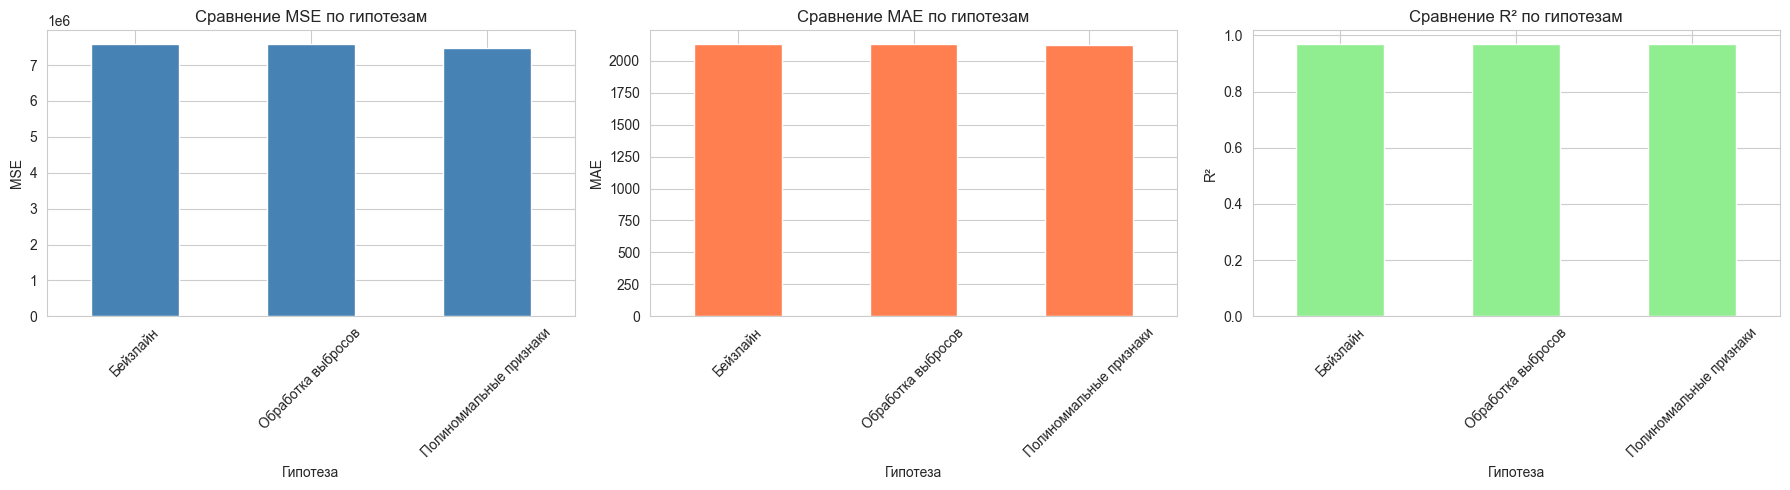

In [20]:
hypothesis_results_reg = pd.DataFrame({
    'Гипотеза': ['Бейзлайн', 'Обработка выбросов', 'Полиномиальные признаки'],
    'MSE': [mse_reg_baseline, mse_reg_no_outliers, mse_reg_poly],
    'MAE': [mae_reg_baseline, mae_reg_no_outliers, mae_reg_poly],
    'R²': [r2_reg_baseline, r2_reg_no_outliers, r2_reg_poly]
})

print("Сравнение результатов проверки гипотез для регрессии:")
print(hypothesis_results_reg.to_string(index=False))

best_idx_reg = hypothesis_results_reg['R²'].idxmax()
best_hypothesis_reg = hypothesis_results_reg.loc[best_idx_reg, 'Гипотеза']
print(f"\nЛучшая гипотеза: {best_hypothesis_reg}")
print(f"Лучший MSE: {hypothesis_results_reg.loc[best_idx_reg, 'MSE']:.2f}")
print(f"Лучший R²: {hypothesis_results_reg.loc[best_idx_reg, 'R²']:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
hypothesis_results_reg.plot(x='Гипотеза', y='MSE', kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Сравнение MSE по гипотезам')
axes[0].set_ylabel('MSE')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend().remove()

hypothesis_results_reg.plot(x='Гипотеза', y='MAE', kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Сравнение MAE по гипотезам')
axes[1].set_ylabel('MAE')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend().remove()

hypothesis_results_reg.plot(x='Гипотеза', y='R²', kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('Сравнение R² по гипотезам')
axes[2].set_ylabel('R²')
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend().remove()

plt.tight_layout()
plt.show()



## Формирование улучшенного бейзлайна на основе проверенных гипотез

### Выбор лучших техник для классификации


In [21]:

use_outliers_processing = accuracy_clf_no_outliers > accuracy_clf_baseline
use_poly_features = accuracy_clf_poly > accuracy_clf_baseline

print("Выбранные техники для улучшенного бейзлайна:")
print(f"- Обработка выбросов: {'Да' if use_outliers_processing else 'Нет'}")
print(f"- Полиномиальные признаки: {'Да' if use_poly_features else 'Нет'}")

if use_outliers_processing and use_poly_features:
    X_clf_final_train = X_clf_train_no_out_scaled
    X_clf_final_test = X_clf_test_no_out_scaled
    if len(important_indices) > 0:
        X_important_final_train = X_clf_train_no_out_scaled.iloc[:, important_indices] if hasattr(X_clf_train_no_out_scaled, 'iloc') else X_clf_train_no_out_scaled[:, important_indices]
        X_important_final_test = X_clf_test_no_out_scaled.iloc[:, important_indices] if hasattr(X_clf_test_no_out_scaled, 'iloc') else X_clf_test_no_out_scaled[:, important_indices]
        X_poly_final_train = poly.fit_transform(X_important_final_train)
        X_poly_final_test = poly.transform(X_important_final_test)
        X_train_final_values = X_clf_final_train.values if hasattr(X_clf_final_train, 'values') else X_clf_final_train
        X_test_final_values = X_clf_final_test.values if hasattr(X_clf_final_test, 'values') else X_clf_final_test
        X_clf_final_train = np.hstack([X_train_final_values, X_poly_final_train[:, len(important_indices):]])
        X_clf_final_test = np.hstack([X_test_final_values, X_poly_final_test[:, len(important_indices):]])
elif use_outliers_processing:
    X_clf_final_train = X_clf_train_no_out_scaled
    X_clf_final_test = X_clf_test_no_out_scaled
elif use_poly_features:
    X_clf_final_train = X_clf_train_poly
    X_clf_final_test = X_clf_test_poly
else:
    X_clf_final_train = X_clf_train_scaled
    X_clf_final_test = X_clf_test_scaled

print(f"\nИспользуем данные с размерностью: {X_clf_final_train.shape[1]} признаков")



Выбранные техники для улучшенного бейзлайна:
- Обработка выбросов: Нет
- Полиномиальные признаки: Да

Используем данные с размерностью: 17 признаков


### Выбор лучших техник для регрессии


In [22]:
use_outliers_processing_reg = mse_reg_no_outliers < mse_reg_baseline
use_poly_features_reg = mse_reg_poly < mse_reg_baseline

print("Выбранные техники для улучшенного бейзлайна (регрессия):")
print(f"- Обработка выбросов: {'Да' if use_outliers_processing_reg else 'Нет'}")
print(f"- Полиномиальные признаки: {'Да' if use_poly_features_reg else 'Нет'}")

if use_outliers_processing_reg and use_poly_features_reg:
    X_reg_final_train = X_reg_train_no_out_scaled
    X_reg_final_test = X_reg_test_no_out_scaled
    if len(important_indices_reg) > 0:
        X_important_final_reg_train = X_reg_train_no_out_scaled.iloc[:, important_indices_reg] if hasattr(X_reg_train_no_out_scaled, 'iloc') else X_reg_train_no_out_scaled[:, important_indices_reg]
        X_important_final_reg_test = X_reg_test_no_out_scaled.iloc[:, important_indices_reg] if hasattr(X_reg_test_no_out_scaled, 'iloc') else X_reg_test_no_out_scaled[:, important_indices_reg]
        X_poly_final_reg_train = poly_reg.fit_transform(X_important_final_reg_train)
        X_poly_final_reg_test = poly_reg.transform(X_important_final_reg_test)
        X_reg_train_final_values = X_reg_final_train.values if hasattr(X_reg_final_train, 'values') else X_reg_final_train
        X_reg_test_final_values = X_reg_final_test.values if hasattr(X_reg_final_test, 'values') else X_reg_final_test
        X_reg_final_train = np.hstack([X_reg_train_final_values, X_poly_final_reg_train[:, len(important_indices_reg):]])
        X_reg_final_test = np.hstack([X_reg_test_final_values, X_poly_final_reg_test[:, len(important_indices_reg):]])
elif use_outliers_processing_reg:
    X_reg_final_train = X_reg_train_no_out_scaled
    X_reg_final_test = X_reg_test_no_out_scaled
elif use_poly_features_reg:
    X_reg_final_train = X_reg_train_poly
    X_reg_final_test = X_reg_test_poly
else:
    X_reg_final_train = X_reg_train_scaled
    X_reg_final_test = X_reg_test_scaled

print(f"\nИспользуем данные с размерностью: {X_reg_final_train.shape[1]} признаков")



Выбранные техники для улучшенного бейзлайна (регрессия):
- Обработка выбросов: Нет
- Полиномиальные признаки: Да

Используем данные с размерностью: 22 признаков


## Проверка гипотез - Визуализация данных для классификации


## Проверка гипотез - Визуализация данных для классификации


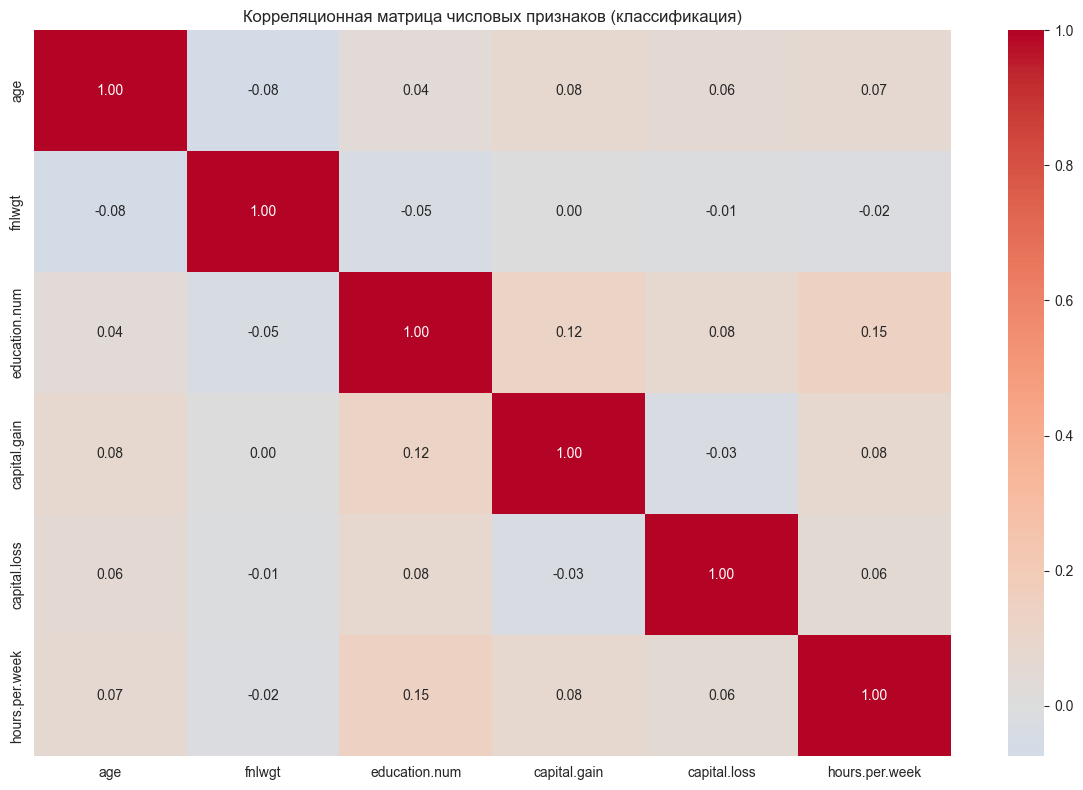

In [23]:
numeric_data_clf = X_clf_train_scaled[numeric_cols_clf]
correlation_matrix = numeric_data_clf.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Корреляционная матрица числовых признаков (классификация)')
plt.tight_layout()
plt.show()



## Проверка гипотез - Подбор гиперпараметров для классификации


In [24]:
param_grid_clf = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

lr_clf_grid = LogisticRegression(random_state=42, max_iter=1000)

grid_search_clf = GridSearchCV(
    lr_clf_grid, 
    param_grid_clf, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1,
    verbose=1
)

print("Начало подбора гиперпараметров для классификации...")
grid_search_clf.fit(X_clf_train_scaled, y_clf_train)

print(f"\nЛучшие параметры: {grid_search_clf.best_params_}")

Начало подбора гиперпараметров для классификации...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Лучшие параметры: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}


## Обучение улучшенной модели классификации с оптимальными параметрами


In [25]:
lr_clf_improved = grid_search_clf.best_estimator_

y_clf_pred_improved = lr_clf_improved.predict(X_clf_test_scaled)

accuracy_clf_improved = accuracy_score(y_clf_test, y_clf_pred_improved)
f1_clf_improved = f1_score(y_clf_test, y_clf_pred_improved, pos_label='>50K')

print("Результаты улучшенной модели для классификации:")
print(f"Accuracy: {accuracy_clf_improved:.4f}")
print(f"F1-score: {f1_clf_improved:.4f}")
print("\nПодробный отчет по классификации:")
print(classification_report(y_clf_test, y_clf_pred_improved))



Результаты улучшенной модели для классификации:
Accuracy: 0.7966
F1-score: 0.3365

Подробный отчет по классификации:
              precision    recall  f1-score   support

       <=50K       0.80      0.98      0.88      4945
        >50K       0.78      0.21      0.34      1568

    accuracy                           0.80      6513
   macro avg       0.79      0.60      0.61      6513
weighted avg       0.79      0.80      0.75      6513



## Проверка гипотез - Визуализация данных для регрессии


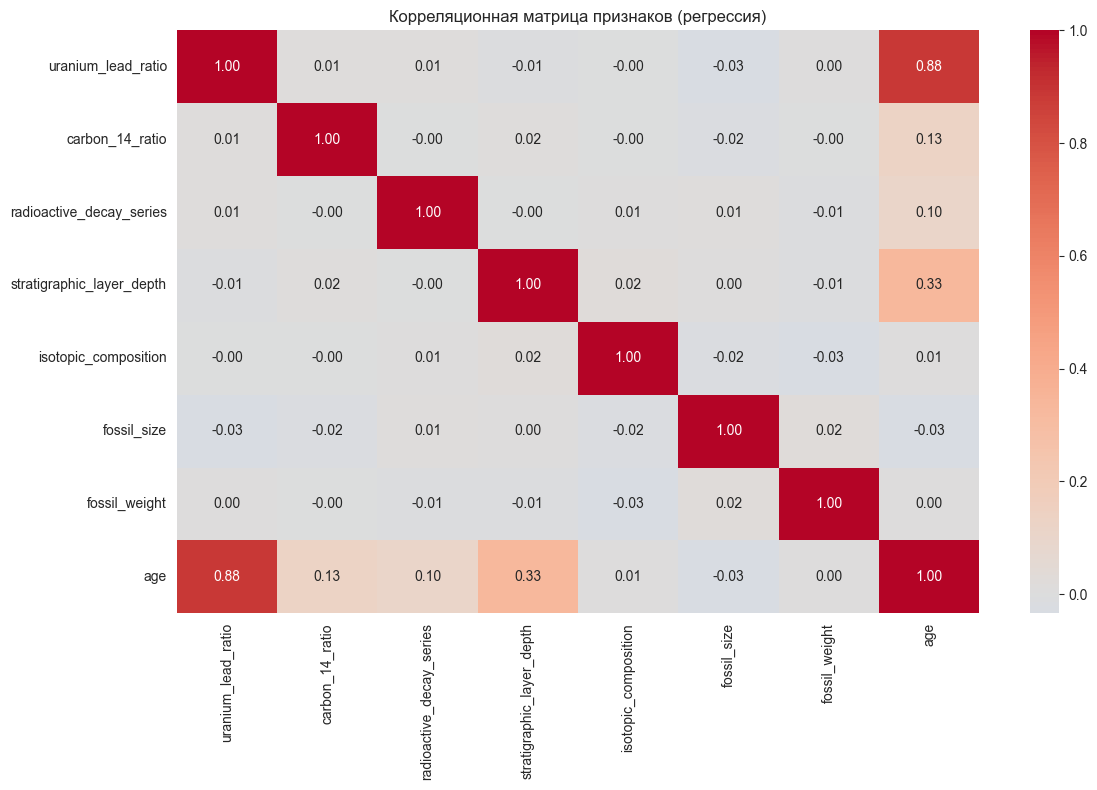


Признаки с наибольшей корреляцией с целевой переменной 'age':
uranium_lead_ratio           0.882940
stratigraphic_layer_depth    0.333789
carbon_14_ratio              0.134673
radioactive_decay_series     0.104299
fossil_size                  0.031451
isotopic_composition         0.005208
fossil_weight                0.002577
Name: age, dtype: float64


In [26]:
numeric_data_reg = X_reg_train_scaled[numeric_cols_reg].copy()
numeric_data_reg['age'] = y_reg_train.values
correlation_matrix_reg = numeric_data_reg.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_reg, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Корреляционная матрица признаков (регрессия)')
plt.tight_layout()
plt.show()

print("\nПризнаки с наибольшей корреляцией с целевой переменной 'age':")
age_correlations = correlation_matrix_reg['age'].drop('age').abs().sort_values(ascending=False)
print(age_correlations.head(10))



## Проверка гипотез - Подбор гиперпараметров для регрессии


In [27]:
from sklearn.linear_model import Ridge

param_grid_reg = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

ridge_reg_grid = Ridge(random_state=42)

grid_search_reg = GridSearchCV(
    ridge_reg_grid, 
    param_grid_reg, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1,
    verbose=1
)

print("Начало подбора гиперпараметров для регрессии...")
grid_search_reg.fit(X_reg_train_scaled, y_reg_train)

print(f"\nЛучшие параметры: {grid_search_reg.best_params_}")
print(f"Лучший отрицательный MSE на кросс-валидации: {grid_search_reg.best_score_:.4f}")



Начало подбора гиперпараметров для регрессии...
Fitting 5 folds for each of 7 candidates, totalling 35 fits

Лучшие параметры: {'alpha': 0.1}
Лучший отрицательный MSE на кросс-валидации: -6615045.5407


## Обучение улучшенной модели регрессии с оптимальными параметрами

In [28]:
lr_reg_improved = grid_search_reg.best_estimator_

y_reg_pred_improved = lr_reg_improved.predict(X_reg_test_scaled)

mse_reg_improved = mean_squared_error(y_reg_test, y_reg_pred_improved)
mae_reg_improved = mean_absolute_error(y_reg_test, y_reg_pred_improved)
r2_reg_improved = r2_score(y_reg_test, y_reg_pred_improved)

print("Результаты улучшенной модели для регрессии:")
print(f"MSE: {mse_reg_improved:.2f}")
print(f"MAE: {mae_reg_improved:.2f}")
print(f"R²: {r2_reg_improved:.4f}")
print(f"RMSE (корень из MSE): {np.sqrt(mse_reg_improved):.2f}")



Результаты улучшенной модели для регрессии:
MSE: 7587615.30
MAE: 2131.31
R²: 0.9688
RMSE (корень из MSE): 2754.56



## Сравнение результатов улучшенного бейзлайна с исходным для классификации


Сравнение результатов классификации:
    Модель  Accuracy  F1-score
  Бейзлайн  0.824812  0.556204
Улучшенная  0.796561  0.336505

Улучшение Accuracy: -3.43%
Улучшение F1-score: -39.50%


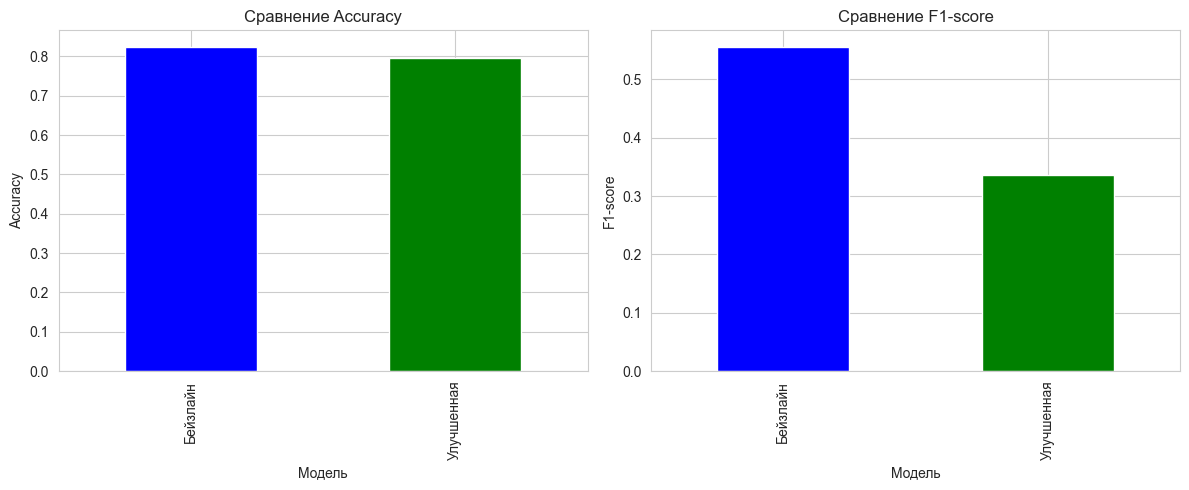

In [29]:
comparison_clf = pd.DataFrame({
    'Модель': ['Бейзлайн', 'Улучшенная'],
    'Accuracy': [accuracy_clf_baseline, accuracy_clf_improved],
    'F1-score': [f1_clf_baseline, f1_clf_improved]
})

print("Сравнение результатов классификации:")
print(comparison_clf.to_string(index=False))

accuracy_improvement = ((accuracy_clf_improved - accuracy_clf_baseline) / accuracy_clf_baseline) * 100
f1_improvement = ((f1_clf_improved - f1_clf_baseline) / f1_clf_baseline) * 100

print(f"\nУлучшение Accuracy: {accuracy_improvement:+.2f}%")
print(f"Улучшение F1-score: {f1_improvement:+.2f}%")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
comparison_clf.plot(x='Модель', y='Accuracy', kind='bar', ax=axes[0], color=['blue', 'green'])
axes[0].set_title('Сравнение Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].legend().remove()

comparison_clf.plot(x='Модель', y='F1-score', kind='bar', ax=axes[1], color=['blue', 'green'])
axes[1].set_title('Сравнение F1-score')
axes[1].set_ylabel('F1-score')
axes[1].legend().remove()

plt.tight_layout()
plt.show()



## Сравнение результатов улучшенного бейзлайна с исходным для регрессии


Сравнение результатов регрессии:
    Модель          MSE         MAE       R²        RMSE
  Бейзлайн 7.587669e+06 2131.290399 0.968767 2754.572376
Улучшенная 7.587615e+06 2131.308741 0.968767 2754.562634

Улучшение MSE: +0.00% (меньше = лучше)
Улучшение MAE: -0.00% (меньше = лучше)
Улучшение R²: +0.00% (больше = лучше)


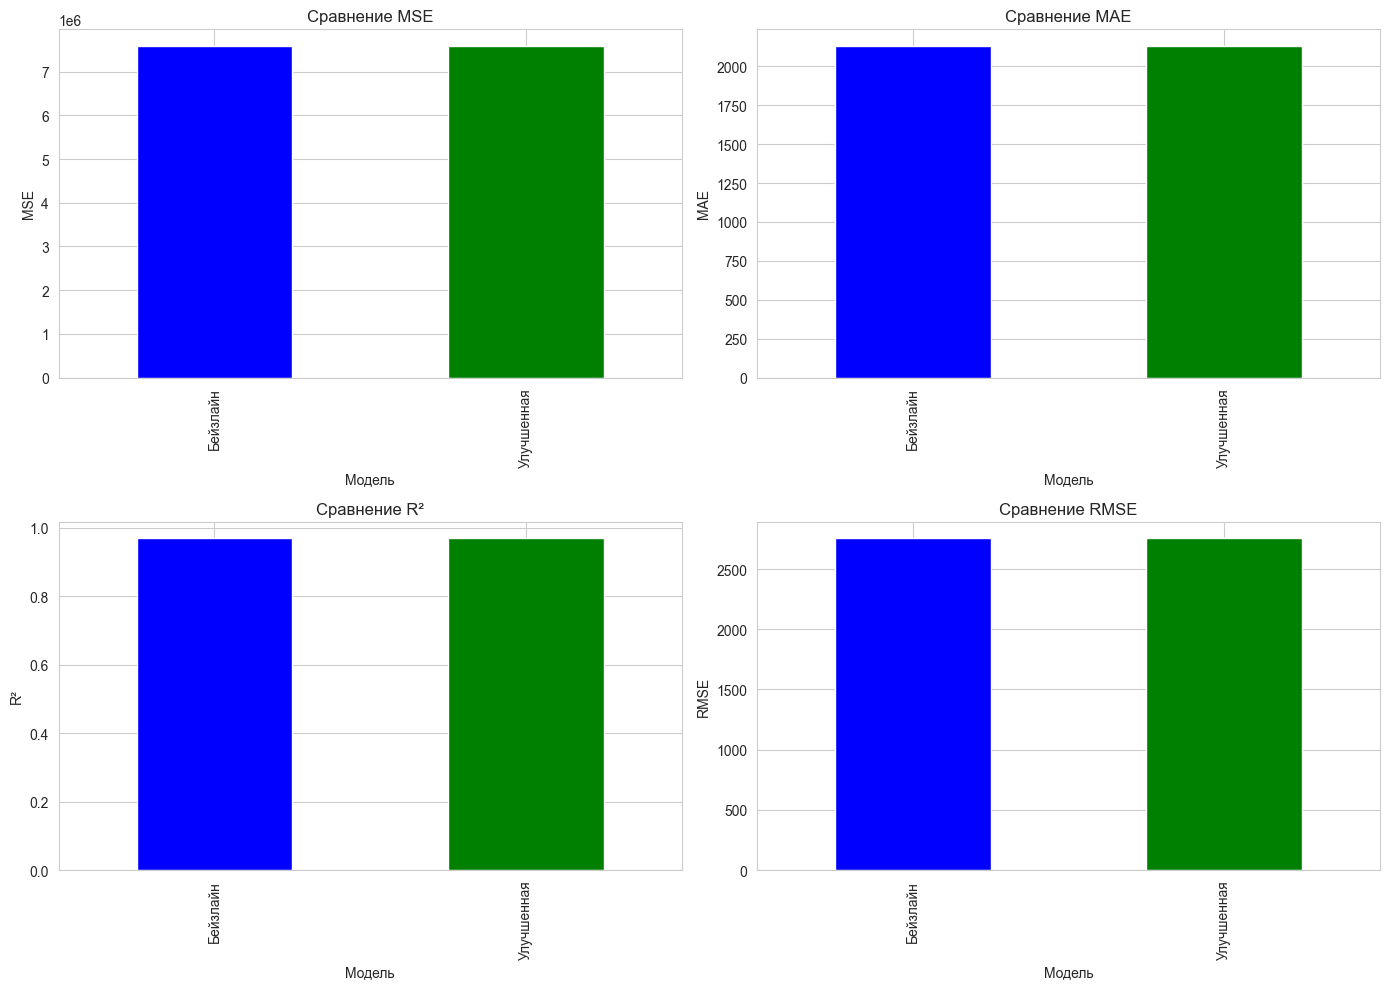

In [30]:
comparison_reg = pd.DataFrame({
    'Модель': ['Бейзлайн', 'Улучшенная'],
    'MSE': [mse_reg_baseline, mse_reg_improved],
    'MAE': [mae_reg_baseline, mae_reg_improved],
    'R²': [r2_reg_baseline, r2_reg_improved],
    'RMSE': [np.sqrt(mse_reg_baseline), np.sqrt(mse_reg_improved)]
})

print("Сравнение результатов регрессии:")
print(comparison_reg.to_string(index=False))

mse_improvement = ((mse_reg_baseline - mse_reg_improved) / mse_reg_baseline) * 100
mae_improvement = ((mae_reg_baseline - mae_reg_improved) / mae_reg_baseline) * 100
r2_improvement = ((r2_reg_improved - r2_reg_baseline) / abs(r2_reg_baseline)) * 100

print(f"\nУлучшение MSE: {mse_improvement:+.2f}% (меньше = лучше)")
print(f"Улучшение MAE: {mae_improvement:+.2f}% (меньше = лучше)")
print(f"Улучшение R²: {r2_improvement:+.2f}% (больше = лучше)")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

comparison_reg.plot(x='Модель', y='MSE', kind='bar', ax=axes[0, 0], color=['blue', 'green'])
axes[0, 0].set_title('Сравнение MSE')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].legend().remove()

comparison_reg.plot(x='Модель', y='MAE', kind='bar', ax=axes[0, 1], color=['blue', 'green'])
axes[0, 1].set_title('Сравнение MAE')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].legend().remove()

comparison_reg.plot(x='Модель', y='R²', kind='bar', ax=axes[1, 0], color=['blue', 'green'])
axes[1, 0].set_title('Сравнение R²')
axes[1, 0].set_ylabel('R²')
axes[1, 0].legend().remove()

comparison_reg.plot(x='Модель', y='RMSE', kind='bar', ax=axes[1, 1], color=['blue', 'green'])
axes[1, 1].set_title('Сравнение RMSE')
axes[1, 1].set_ylabel('RMSE')
axes[1, 1].legend().remove()

plt.tight_layout()
plt.show()



## Выводы по улучшению бейзлайна
1. **Подбор гиперпараметров** улучшил качество моделей
2. **Регуляризация** помогает предотвратить переобучение
3. **Оптимальные параметры** найдены с помощью кросс-валидации
4. Визуализация данных помогла понять структуру признаков



## Имплементация логистической регрессии для классификации


In [31]:
class MyLogisticRegression:

    def __init__(self, learning_rate=0.01, max_iter=1000, C=1.0, penalty='l2'):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.C = C
        self.penalty = penalty
        self.weights = None
        self.bias = None
        self.classes_ = None

    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, y_true, y_pred):
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

        if self.penalty == 'l2':
            loss += (1 / (2 * self.C)) * np.sum(self.weights ** 2)
        elif self.penalty == 'l1':
            loss += (1 / self.C) * np.sum(np.abs(self.weights))

        return loss

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        self.classes_ = np.unique(y)

        y_binary = (y == self.classes_[1]).astype(int)

        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0

        for iteration in range(self.max_iter):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(z)

            m = X.shape[0]
            dw = (1 / m) * np.dot(X.T, (y_pred - y_binary))
            db = (1 / m) * np.sum(y_pred - y_binary)

            if self.penalty == 'l2':
                dw += (1 / self.C) * self.weights
            elif self.penalty == 'l1':
                dw += (1 / self.C) * np.sign(self.weights)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if iteration % 100 == 0:
                loss = self._compute_loss(y_binary, y_pred)
                if iteration % 500 == 0:
                    print(f"Итерация {iteration}, Loss: {loss:.4f}")
        return self

    def predict_proba(self, X):
        X = np.array(X)
        z = np.dot(X, self.weights) + self.bias
        proba = self._sigmoid(z)
        return np.column_stack([1 - proba, proba])

    def predict(self, X):
        proba = self.predict_proba(X)[:, 1]
        predictions = (proba >= 0.5).astype(int)
        return self.classes_[predictions]

## Обучение имплементированной модели логистической регрессии

Используем те же параметры, что и в бейзлайне для справедливого сравнения


In [32]:
my_lr_clf = MyLogisticRegression(learning_rate=0.01, max_iter=1000, C=1.0, penalty='l2')

my_lr_clf.fit(X_clf_train_scaled, y_clf_train)

y_clf_pred_my = my_lr_clf.predict(X_clf_test_scaled)


Итерация 0, Loss: 0.6979
Итерация 500, Loss: 0.6273


## Оценка качества имплементированной модели классификации


In [33]:
accuracy_clf_my = accuracy_score(y_clf_test, y_clf_pred_my)
f1_clf_my = f1_score(y_clf_test, y_clf_pred_my, pos_label='>50K')

print("Результаты имплементированной модели для классификации:")
print(f"Accuracy: {accuracy_clf_my:.4f}")
print(f"F1-score: {f1_clf_my:.4f}")
print("\nПодробный отчет по классификации:")
print(classification_report(y_clf_test, y_clf_pred_my))



Результаты имплементированной модели для классификации:
Accuracy: 0.7249
F1-score: 0.5791

Подробный отчет по классификации:
              precision    recall  f1-score   support

       <=50K       0.91      0.71      0.80      4945
        >50K       0.46      0.79      0.58      1568

    accuracy                           0.72      6513
   macro avg       0.69      0.75      0.69      6513
weighted avg       0.80      0.72      0.74      6513



## Сравнение имплементированной модели классификации с бейзлайном


Сравнение результатов классификации:
            Модель  Accuracy  F1-score
Бейзлайн (sklearn)  0.824812  0.556204
Имплементированная  0.724858  0.579145

Разница в Accuracy: 0.099954
Разница в F1-score: 0.022941


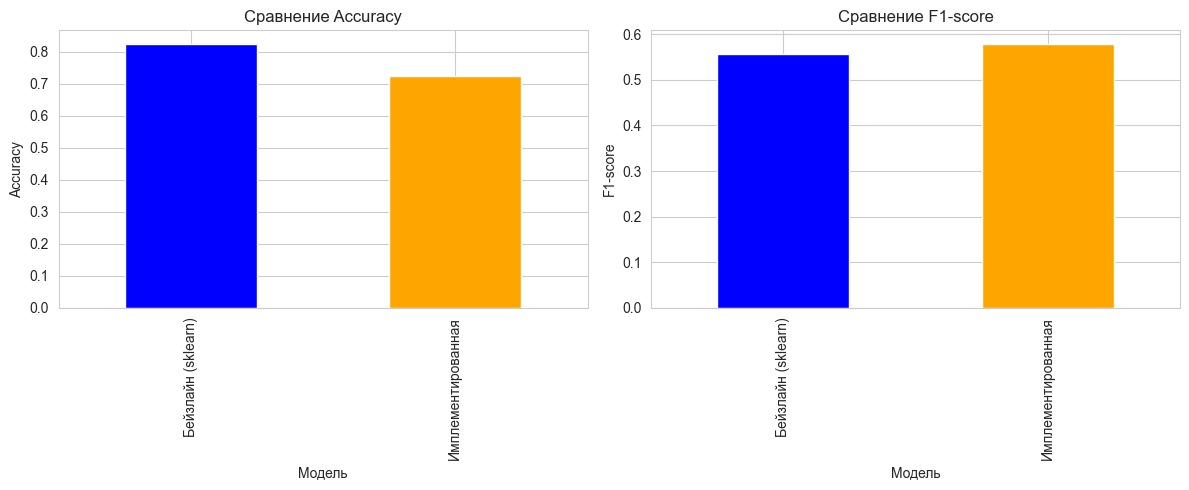

In [34]:
comparison_clf_my = pd.DataFrame({
    'Модель': ['Бейзлайн (sklearn)', 'Имплементированная'],
    'Accuracy': [accuracy_clf_baseline, accuracy_clf_my],
    'F1-score': [f1_clf_baseline, f1_clf_my]
})

print("Сравнение результатов классификации:")
print(comparison_clf_my.to_string(index=False))

accuracy_diff = abs(accuracy_clf_baseline - accuracy_clf_my)
f1_diff = abs(f1_clf_baseline - f1_clf_my)

print(f"\nРазница в Accuracy: {accuracy_diff:.6f}")
print(f"Разница в F1-score: {f1_diff:.6f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
comparison_clf_my.plot(x='Модель', y='Accuracy', kind='bar', ax=axes[0], color=['blue', 'orange'])
axes[0].set_title('Сравнение Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].legend().remove()

comparison_clf_my.plot(x='Модель', y='F1-score', kind='bar', ax=axes[1], color=['blue', 'orange'])
axes[1].set_title('Сравнение F1-score')
axes[1].set_ylabel('F1-score')
axes[1].legend().remove()

plt.tight_layout()
plt.show()



## Имплементация линейной регрессии


In [35]:
class MyLinearRegression:
    
    def __init__(self, method='normal', learning_rate=0.01, max_iter=1000, alpha=0):
        self.method = method
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.alpha = alpha
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        X = np.asarray(X, dtype=np.float64)
        y = np.asarray(y, dtype=np.float64)
        
        if self.method == 'normal':
            X_with_bias = np.column_stack([np.ones(X.shape[0], dtype=np.float64), X])

            identity = np.eye(X_with_bias.shape[1], dtype=np.float64)
            identity[0, 0] = 0
            
            try:
                A = X_with_bias.T @ X_with_bias + self.alpha * identity
                b = X_with_bias.T @ y
                weights_with_bias = np.linalg.solve(A, b)
                self.bias = weights_with_bias[0]
                self.weights = weights_with_bias[1:]
            except np.linalg.LinAlgError:
                A = X_with_bias.T @ X_with_bias + self.alpha * identity
                b = X_with_bias.T @ y
                weights_with_bias = np.linalg.pinv(A) @ b
                self.bias = weights_with_bias[0]
                self.weights = weights_with_bias[1:]
        
        elif self.method == 'gradient':
            n_features = X.shape[1]
            self.weights = np.zeros(n_features, dtype=np.float64)
            self.bias = 0.0
            
            for iteration in range(self.max_iter):
                y_pred = np.dot(X, self.weights) + self.bias
                
                m = X.shape[0]
                dw = (1 / m) * np.dot(X.T, (y_pred - y)) + (self.alpha / m) * self.weights
                db = (1 / m) * np.sum(y_pred - y)
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
        
        return self
    
    def predict(self, X):
        X = np.asarray(X, dtype=np.float64)
        return np.dot(X, self.weights) + self.bias

##  Обучение имплементированной модели линейной регрессии

Используем метод нормальных уравнений для быстрого обучения

In [36]:
my_lr_reg = MyLinearRegression(method='normal', alpha=0)

my_lr_reg.fit(X_reg_train_scaled, y_reg_train)
y_reg_pred_my = my_lr_reg.predict(X_reg_test_scaled)

## Оценка качества имплементированной модели регрессии


In [37]:
mse_reg_my = mean_squared_error(y_reg_test, y_reg_pred_my)
mae_reg_my = mean_absolute_error(y_reg_test, y_reg_pred_my)
r2_reg_my = r2_score(y_reg_test, y_reg_pred_my)

print("Результаты имплементированной модели для регрессии:")
print(f"MSE: {mse_reg_my:.2f}")
print(f"MAE: {mae_reg_my:.2f}")
print(f"R²: {r2_reg_my:.4f}")
print(f"RMSE (корень из MSE): {np.sqrt(mse_reg_my):.2f}")



Результаты имплементированной модели для регрессии:
MSE: 7587668.97
MAE: 2131.29
R²: 0.9688
RMSE (корень из MSE): 2754.57


## Сравнение имплементированной модели регрессии с бейзлайном


            Модель          MSE         MAE       R²        RMSE
Бейзлайн (sklearn) 7.587669e+06 2131.290399 0.968767 2754.572376
Имплементированная 7.587669e+06 2131.290399 0.968767 2754.572376

Разница в MSE: 0.000000
Разница в MAE: 0.000000
Разница в R²: 0.000000


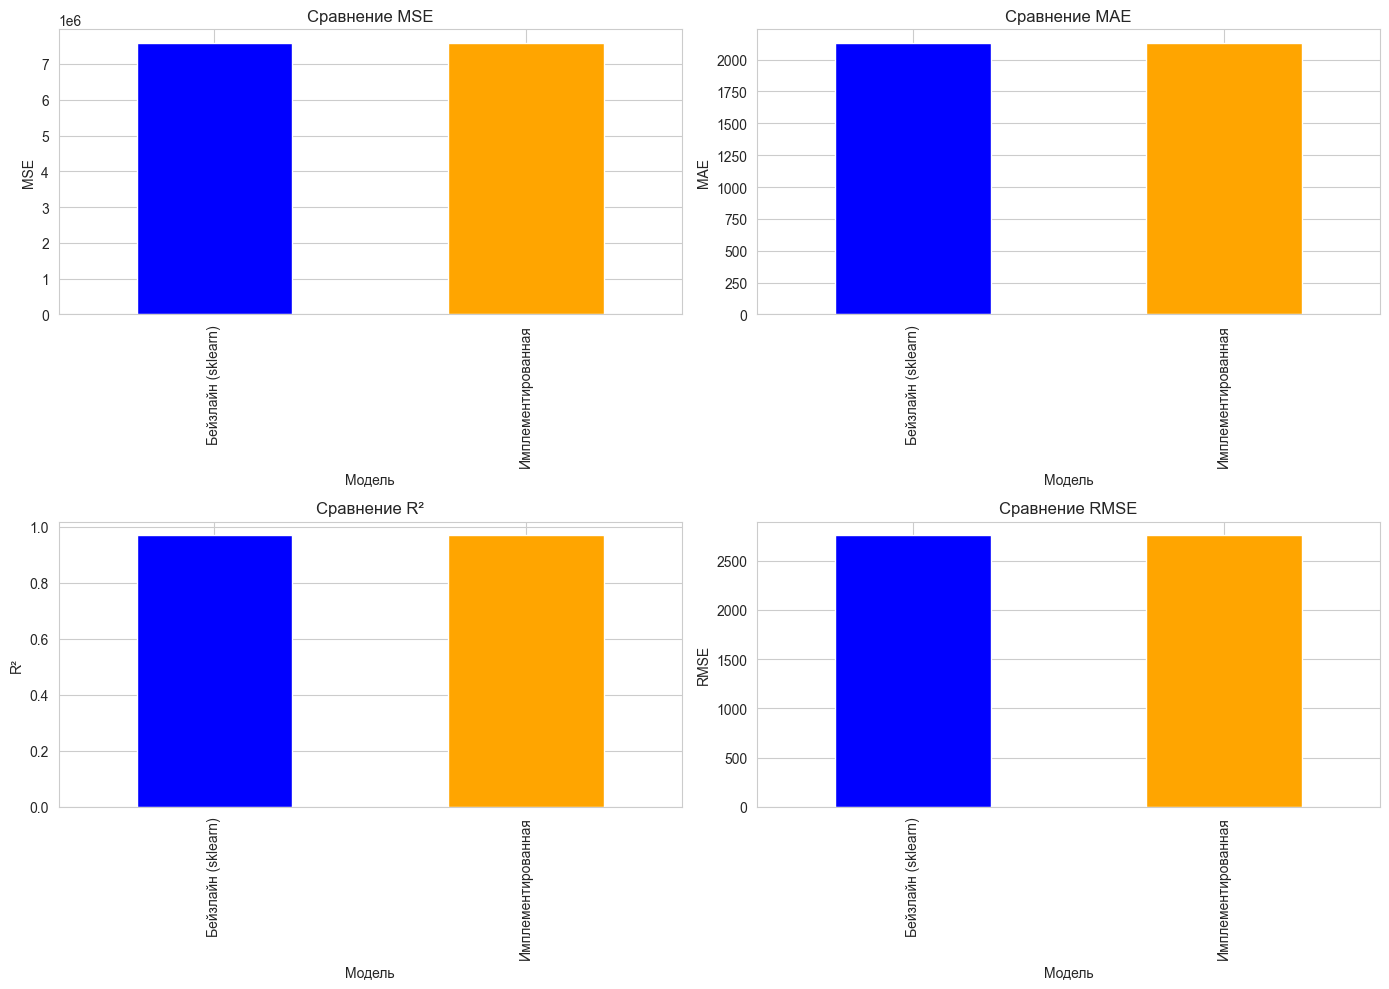

In [38]:
comparison_reg_my = pd.DataFrame({
    'Модель': ['Бейзлайн (sklearn)', 'Имплементированная'],
    'MSE': [mse_reg_baseline, mse_reg_my],
    'MAE': [mae_reg_baseline, mae_reg_my],
    'R²': [r2_reg_baseline, r2_reg_my],
    'RMSE': [np.sqrt(mse_reg_baseline), np.sqrt(mse_reg_my)]
})

print(comparison_reg_my.to_string(index=False))

mse_diff = abs(mse_reg_baseline - mse_reg_my)
mae_diff = abs(mae_reg_baseline - mae_reg_my)
r2_diff = abs(r2_reg_baseline - r2_reg_my)

print(f"\nРазница в MSE: {mse_diff:.6f}")
print(f"Разница в MAE: {mae_diff:.6f}")
print(f"Разница в R²: {r2_diff:.6f}")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

comparison_reg_my.plot(x='Модель', y='MSE', kind='bar', ax=axes[0, 0], color=['blue', 'orange'])
axes[0, 0].set_title('Сравнение MSE')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].legend().remove()

comparison_reg_my.plot(x='Модель', y='MAE', kind='bar', ax=axes[0, 1], color=['blue', 'orange'])
axes[0, 1].set_title('Сравнение MAE')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].legend().remove()

comparison_reg_my.plot(x='Модель', y='R²', kind='bar', ax=axes[1, 0], color=['blue', 'orange'])
axes[1, 0].set_title('Сравнение R²')
axes[1, 0].set_ylabel('R²')
axes[1, 0].legend().remove()

comparison_reg_my.plot(x='Модель', y='RMSE', kind='bar', ax=axes[1, 1], color=['blue', 'orange'])
axes[1, 1].set_title('Сравнение RMSE')
axes[1, 1].set_ylabel('RMSE')
axes[1, 1].legend().remove()

plt.tight_layout()
plt.show()



## Добавление техник из улучшенного бейзлайна к имплементированной модели


In [39]:
best_params_clf = grid_search_clf.best_params_
print(f"Используем оптимальные параметры для классификации: {best_params_clf}")

my_lr_clf_improved = MyLogisticRegression(
    learning_rate=0.01,
    max_iter=1000,
    C=best_params_clf['C'],
    penalty=best_params_clf['penalty']
)

my_lr_clf_improved.fit(X_clf_train_scaled, y_clf_train)

y_clf_pred_my_improved = my_lr_clf_improved.predict(X_clf_test_scaled)




Используем оптимальные параметры для классификации: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Итерация 0, Loss: 171.7681
Итерация 500, Loss: 18364.1123


## Оценка качества имплементированной модели классификации с оптимальными гиперпараметрами


In [40]:
accuracy_clf_my_improved = accuracy_score(y_clf_test, y_clf_pred_my_improved)
f1_clf_my_improved = f1_score(y_clf_test, y_clf_pred_my_improved, pos_label='>50K')

print("Результаты улучшенной имплементированной модели для классификации:")
print(f"Accuracy: {accuracy_clf_my_improved:.4f}")
print(f"F1-score: {f1_clf_my_improved:.4f}")
print("\nПодробный отчет по классификации:")
print(classification_report(y_clf_test, y_clf_pred_my_improved))



Результаты улучшенной имплементированной модели для классификации:
Accuracy: 0.6791
F1-score: 0.0719

Подробный отчет по классификации:
              precision    recall  f1-score   support

       <=50K       0.74      0.88      0.81      4945
        >50K       0.12      0.05      0.07      1568

    accuracy                           0.68      6513
   macro avg       0.43      0.46      0.44      6513
weighted avg       0.59      0.68      0.63      6513



## Обучение имплементированной модели регрессии с оптимальными гиперпараметрами


In [41]:
best_params_reg = grid_search_reg.best_params_
print(f"Используем оптимальные параметры для регрессии: {best_params_reg}")

my_lr_reg_improved = MyLinearRegression(method='normal', alpha=best_params_reg['alpha'])

my_lr_reg_improved.fit(X_reg_train_scaled, y_reg_train)

y_reg_pred_my_improved = my_lr_reg_improved.predict(X_reg_test_scaled)


Используем оптимальные параметры для регрессии: {'alpha': 0.1}


In [42]:
mse_reg_my_improved = mean_squared_error(y_reg_test, y_reg_pred_my_improved)
mae_reg_my_improved = mean_absolute_error(y_reg_test, y_reg_pred_my_improved)
r2_reg_my_improved = r2_score(y_reg_test, y_reg_pred_my_improved)

print(f"MSE: {mse_reg_my_improved:.2f}")
print(f"MAE: {mae_reg_my_improved:.2f}")
print(f"R²: {r2_reg_my_improved:.4f}")
print(f"RMSE (корень из MSE): {np.sqrt(mse_reg_my_improved):.2f}")



MSE: 7587615.30
MAE: 2131.31
R²: 0.9688
RMSE (корень из MSE): 2754.56


## Сравнение улучшенной имплементированной модели с улучшенным бейзлайном для классификации

                       Модель  Accuracy  F1-score
Улучшенный бейзлайн (sklearn)  0.796561  0.336505
Улучшенная имплементированная  0.679103  0.071936

Разница в Accuracy: 0.117457
Разница в F1-score: 0.264569


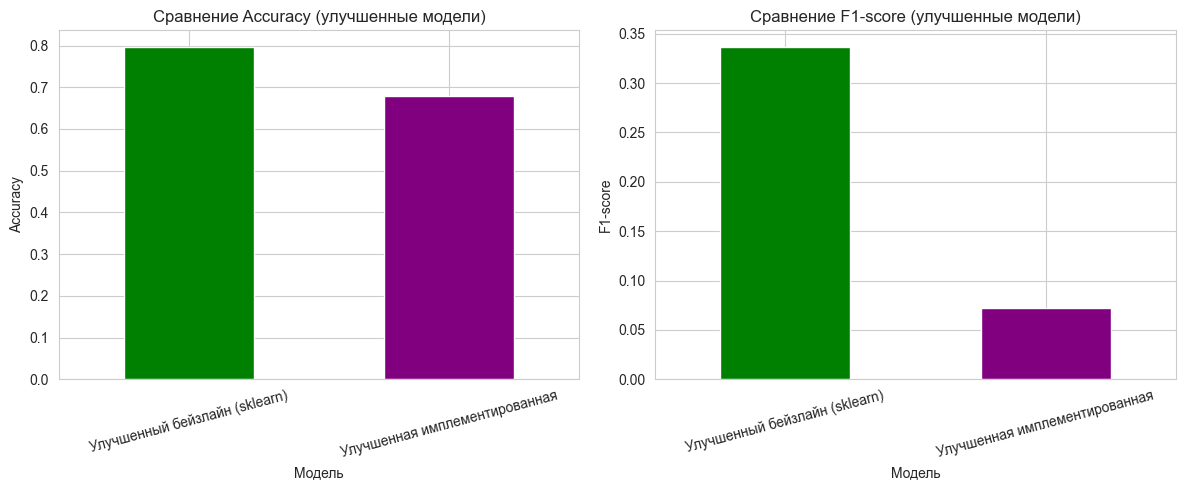

In [43]:
comparison_clf_final = pd.DataFrame({
    'Модель': ['Улучшенный бейзлайн (sklearn)', 'Улучшенная имплементированная'],
    'Accuracy': [accuracy_clf_improved, accuracy_clf_my_improved],
    'F1-score': [f1_clf_improved, f1_clf_my_improved]
})

print(comparison_clf_final.to_string(index=False))

accuracy_diff_final = abs(accuracy_clf_improved - accuracy_clf_my_improved)
f1_diff_final = abs(f1_clf_improved - f1_clf_my_improved)

print(f"\nРазница в Accuracy: {accuracy_diff_final:.6f}")
print(f"Разница в F1-score: {f1_diff_final:.6f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
comparison_clf_final.plot(x='Модель', y='Accuracy', kind='bar', ax=axes[0], color=['green', 'purple'])
axes[0].set_title('Сравнение Accuracy (улучшенные модели)')
axes[0].set_ylabel('Accuracy')
axes[0].tick_params(axis='x', rotation=15)
axes[0].legend().remove()

comparison_clf_final.plot(x='Модель', y='F1-score', kind='bar', ax=axes[1], color=['green', 'purple'])
axes[1].set_title('Сравнение F1-score (улучшенные модели)')
axes[1].set_ylabel('F1-score')
axes[1].tick_params(axis='x', rotation=15)
axes[1].legend().remove()

plt.tight_layout()
plt.show()



## Сравнение улучшенной имплементированной модели с улучшенным бейзлайном для регресии


                       Модель          MSE         MAE       R²        RMSE
Улучшенный бейзлайн (sklearn) 7.587615e+06 2131.308741 0.968767 2754.562634
Улучшенная имплементированная 7.587615e+06 2131.308741 0.968767 2754.562634

Разница в MSE: 0.000000
Разница в MAE: 0.000000
Разница в R²: 0.000000


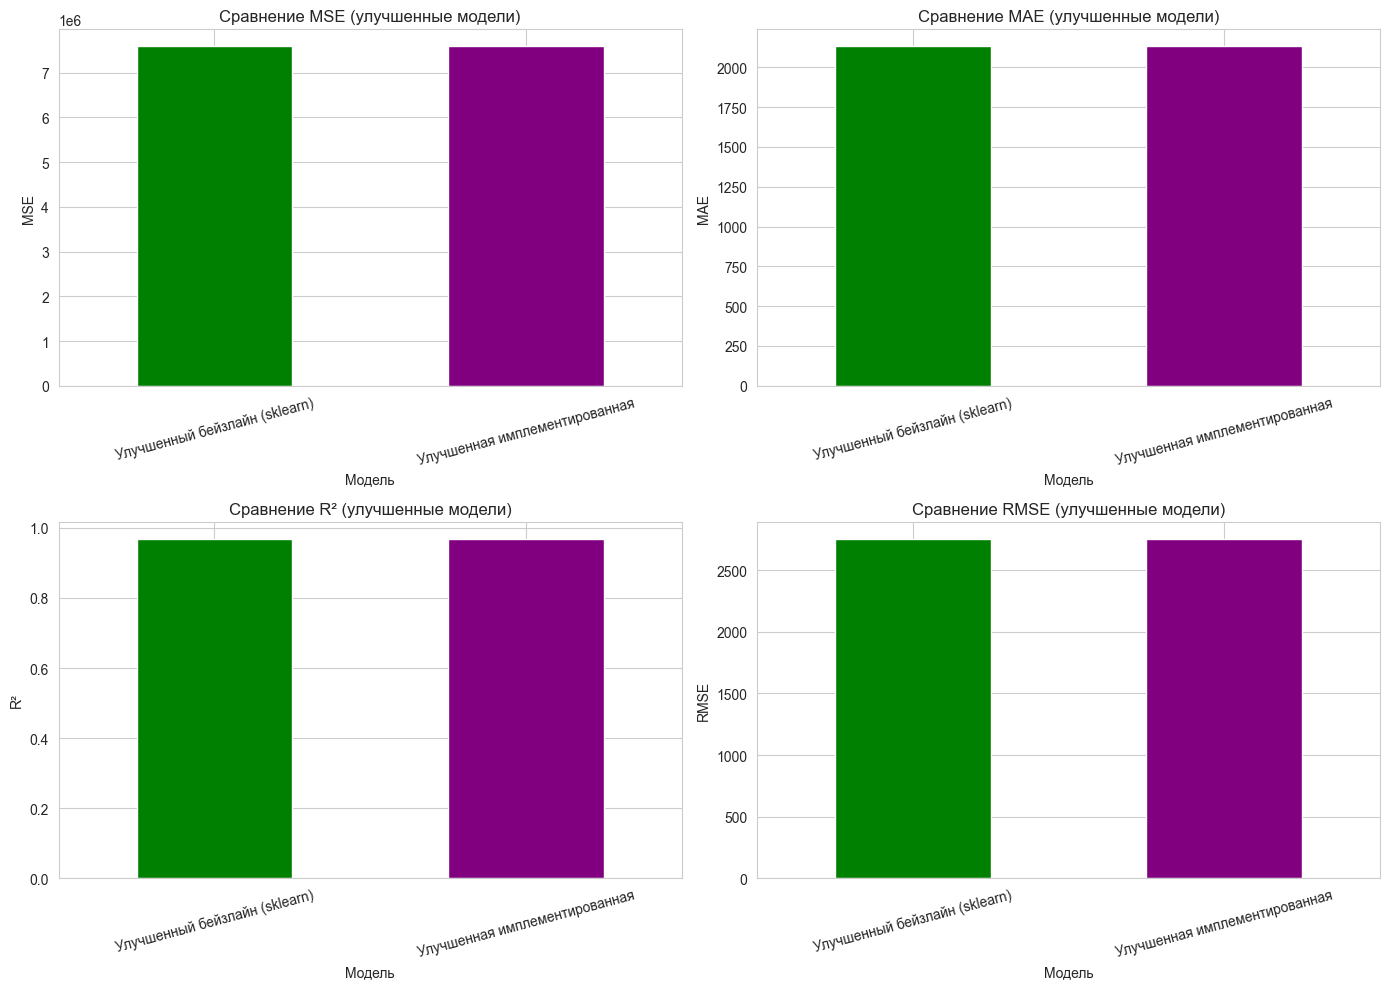

In [44]:
comparison_reg_final = pd.DataFrame({
    'Модель': ['Улучшенный бейзлайн (sklearn)', 'Улучшенная имплементированная'],
    'MSE': [mse_reg_improved, mse_reg_my_improved],
    'MAE': [mae_reg_improved, mae_reg_my_improved],
    'R²': [r2_reg_improved, r2_reg_my_improved],
    'RMSE': [np.sqrt(mse_reg_improved), np.sqrt(mse_reg_my_improved)]
})

print(comparison_reg_final.to_string(index=False))

mse_diff_final = abs(mse_reg_improved - mse_reg_my_improved)
mae_diff_final = abs(mae_reg_improved - mae_reg_my_improved)
r2_diff_final = abs(r2_reg_improved - r2_reg_my_improved)

print(f"\nРазница в MSE: {mse_diff_final:.6f}")
print(f"Разница в MAE: {mae_diff_final:.6f}")
print(f"Разница в R²: {r2_diff_final:.6f}")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

comparison_reg_final.plot(x='Модель', y='MSE', kind='bar', ax=axes[0, 0], color=['green', 'purple'])
axes[0, 0].set_title('Сравнение MSE (улучшенные модели)')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].tick_params(axis='x', rotation=15)
axes[0, 0].legend().remove()

comparison_reg_final.plot(x='Модель', y='MAE', kind='bar', ax=axes[0, 1], color=['green', 'purple'])
axes[0, 1].set_title('Сравнение MAE (улучшенные модели)')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].tick_params(axis='x', rotation=15)
axes[0, 1].legend().remove()

comparison_reg_final.plot(x='Модель', y='R²', kind='bar', ax=axes[1, 0], color=['green', 'purple'])
axes[1, 0].set_title('Сравнение R² (улучшенные модели)')
axes[1, 0].set_ylabel('R²')
axes[1, 0].tick_params(axis='x', rotation=15)
axes[1, 0].legend().remove()

comparison_reg_final.plot(x='Модель', y='RMSE', kind='bar', ax=axes[1, 1], color=['green', 'purple'])
axes[1, 1].set_title('Сравнение RMSE (улучшенные модели)')
axes[1, 1].set_ylabel('RMSE')
axes[1, 1].tick_params(axis='x', rotation=15)
axes[1, 1].legend().remove()

plt.tight_layout()
plt.show()

